In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
%matplotlib inline

In [5]:
df=pd.read_csv('C:\\Users\\Nadeen\\vs_code\\AI_Water_Quality_Project\\water_potability.csv')

In [6]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [7]:
df.shape

(3276, 10)

In [8]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [9]:
df.tail()

ph    Hardness        Solids  Chloramines     Sulfate  \
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1

In [10]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [12]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [13]:
df['ph']=df['ph'].fillna(df.groupby(['Potability'])['ph'].transform('mean'))
df['Sulfate']=df['Sulfate'].fillna(df.groupby(['Potability'])['Sulfate'].transform('mean'))
df['Trihalomethanes']=df['Trihalomethanes'].fillna(df.groupby(['Potability'])['Trihalomethanes'].transform('mean'))

In [14]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [15]:
df.duplicated().sum()

0

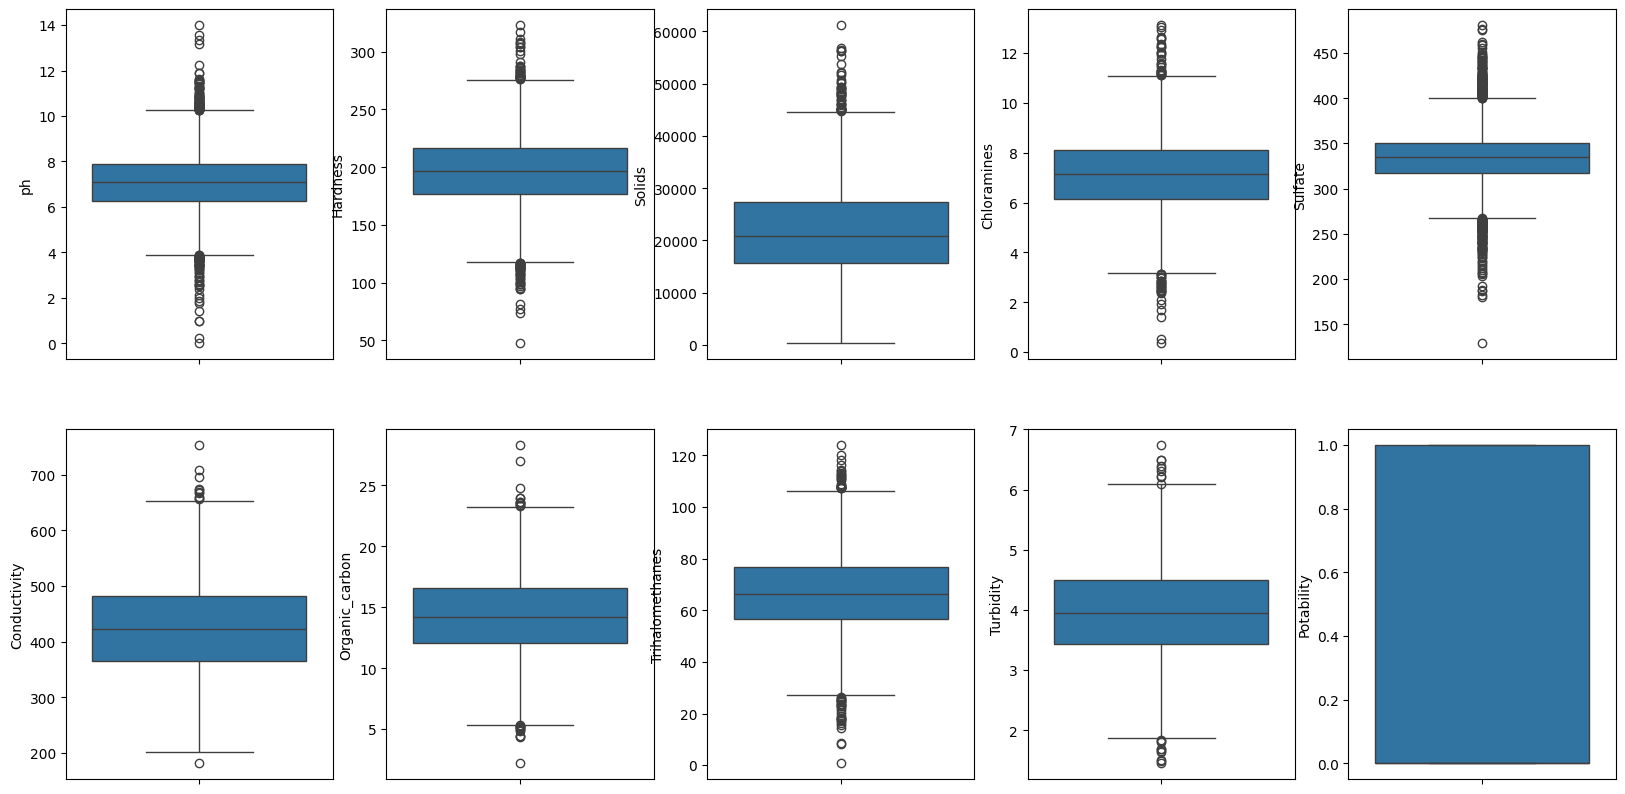

In [16]:
fig, ax =plt.subplots(ncols=5,nrows=2,figsize=(20,10))

ax=ax.flatten()

index=0

for col,values in df.items():
    sns.boxplot(y=col,data=df,ax=ax[index])

    index +=1

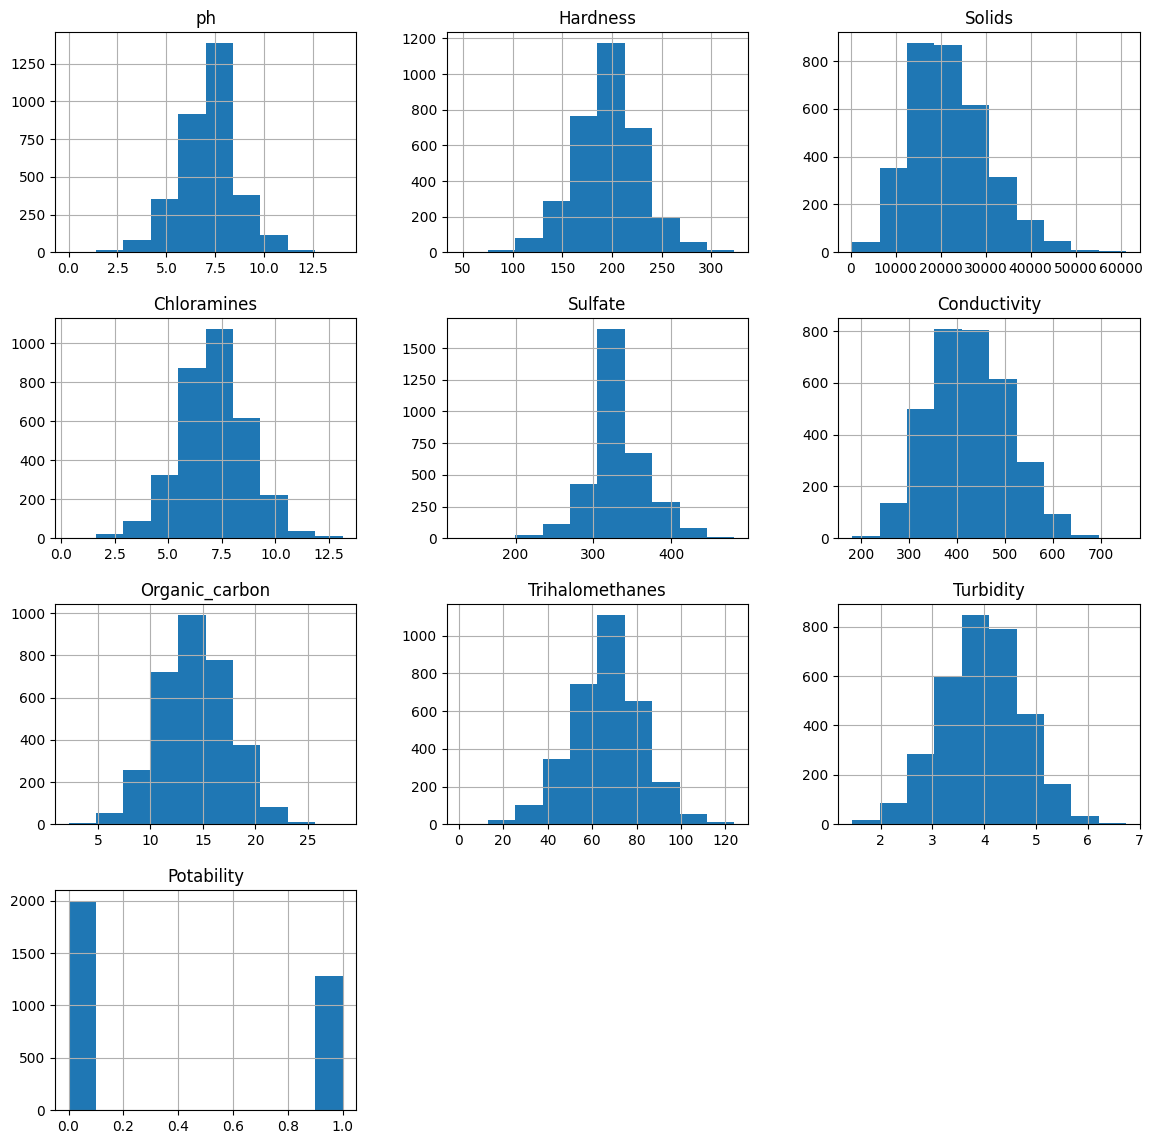

In [17]:
df.hist(figsize=(14,14))
plt.show()

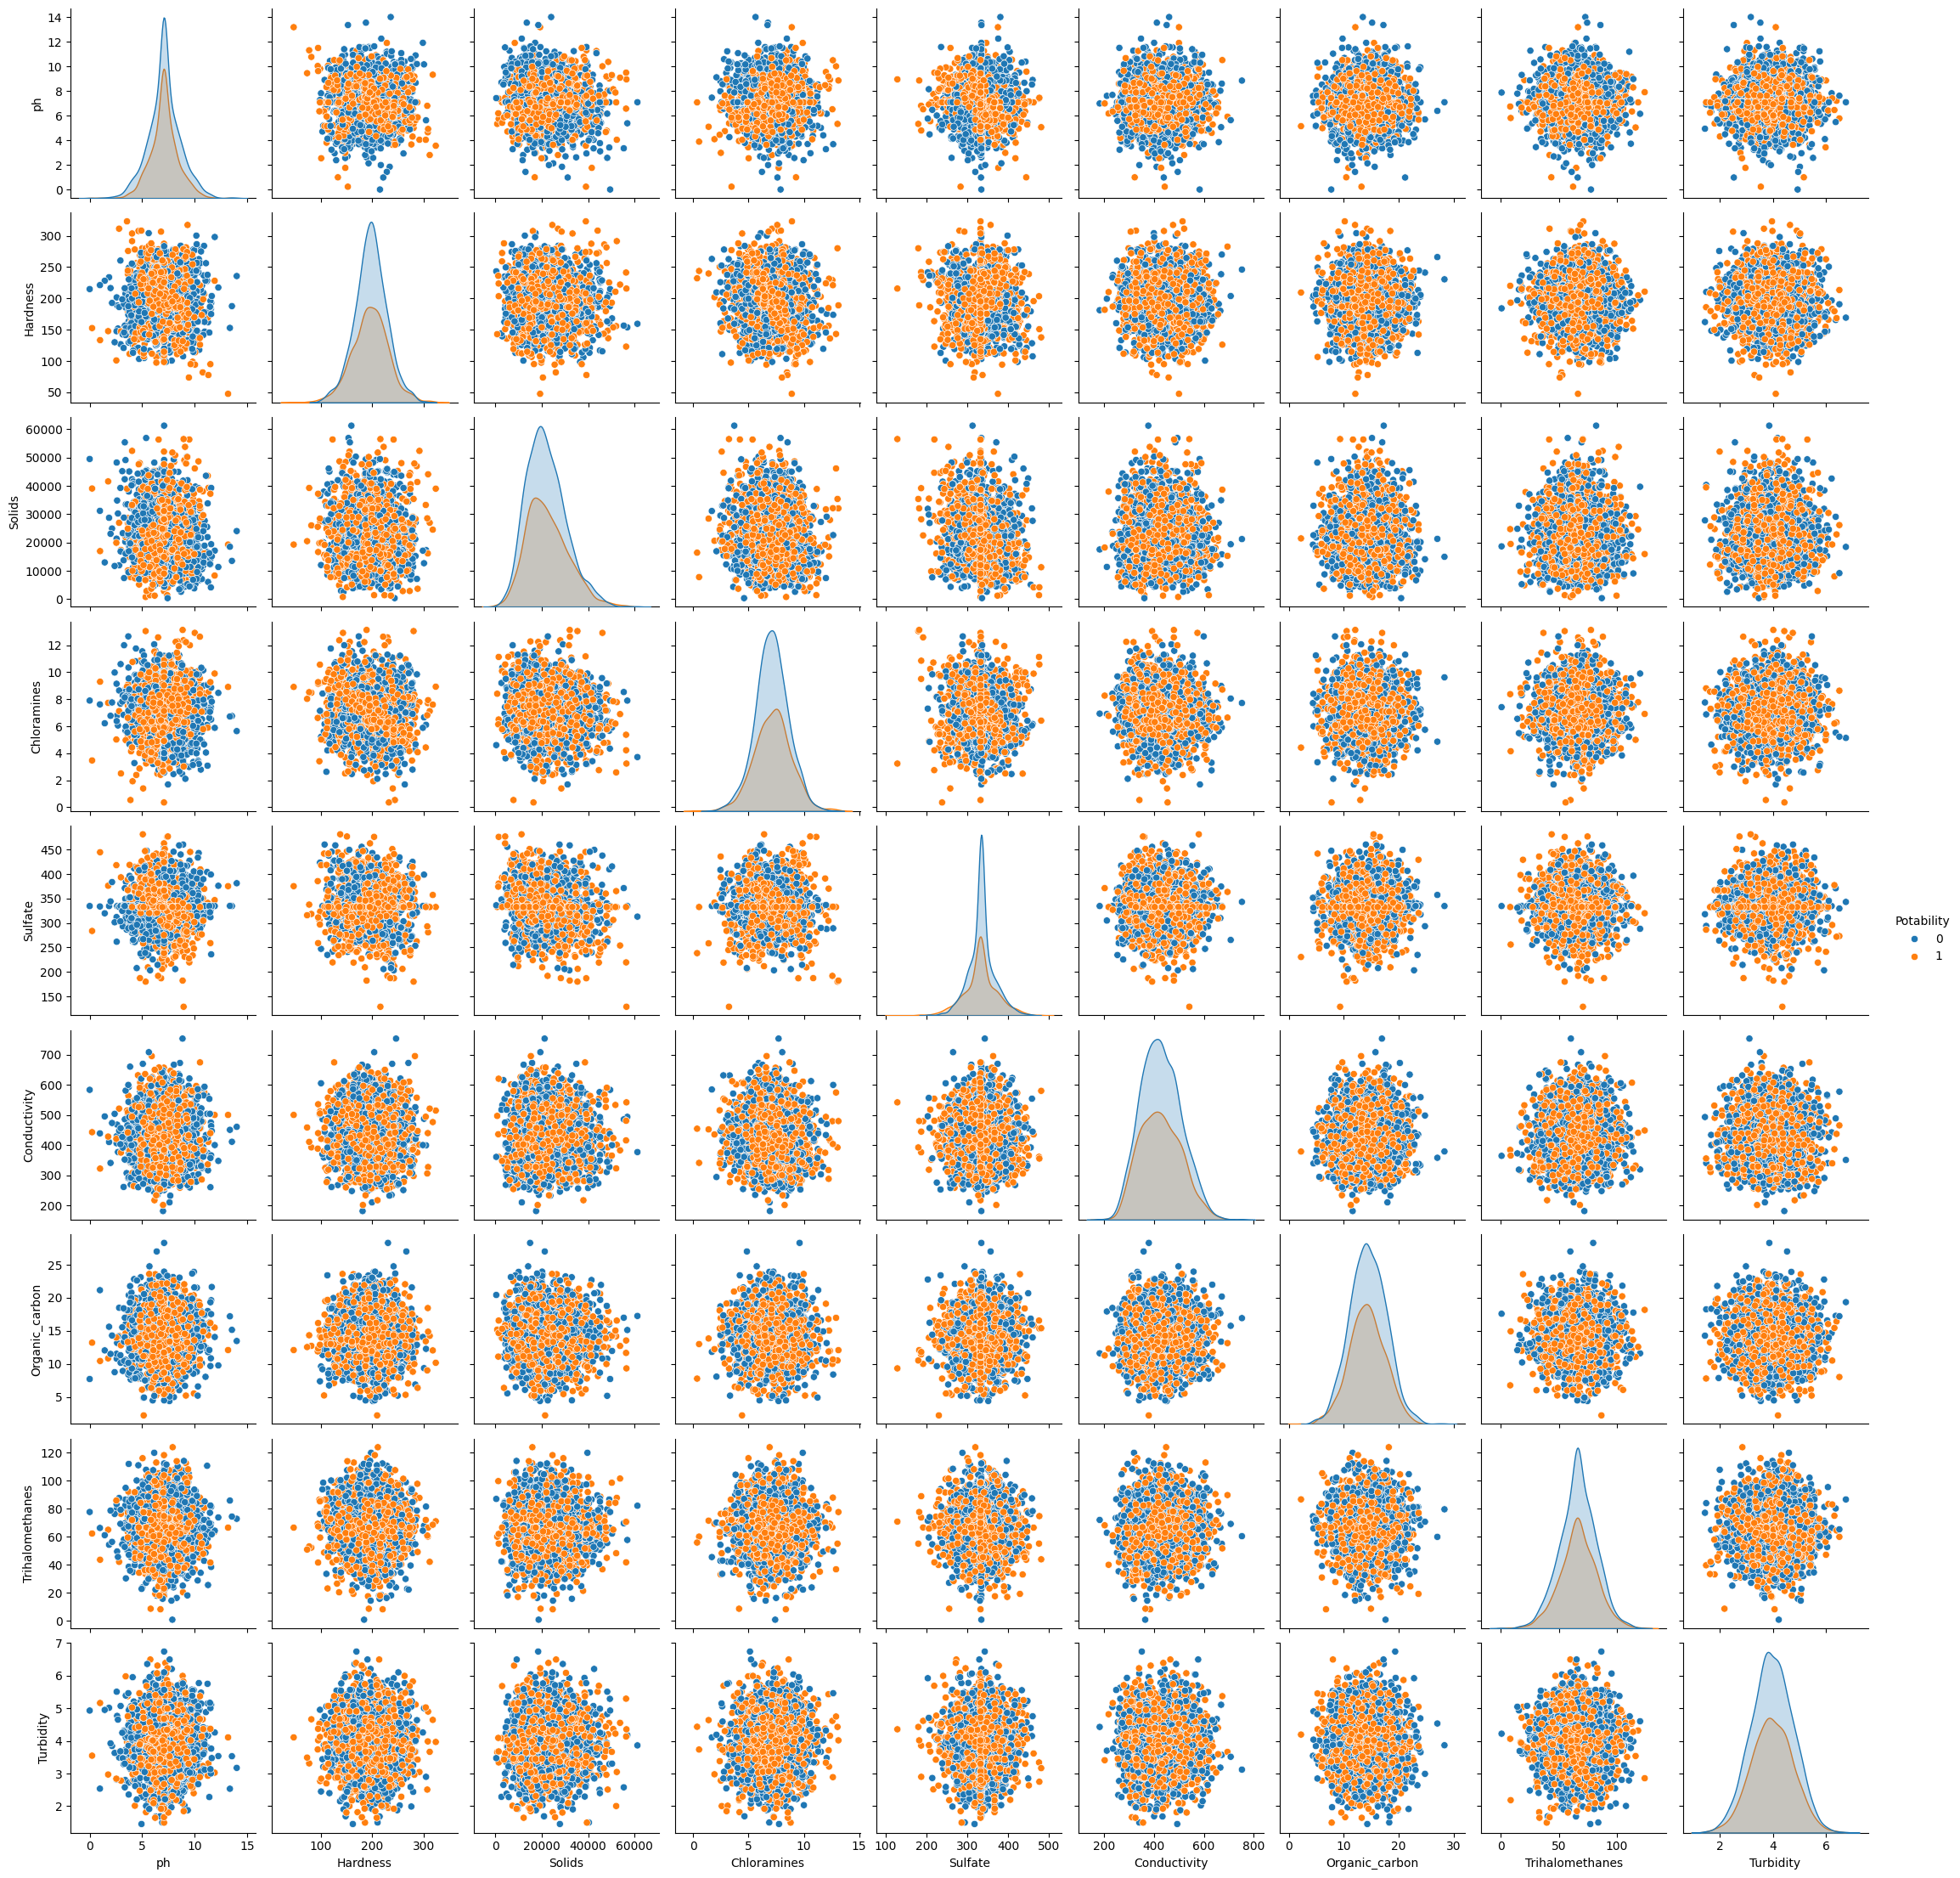

In [18]:
sns.pairplot(df,hue='Potability')

In [19]:
import plotly.graph_objects as go
labels = ['Not Potable','Potable']
values = [df[df["Potability"]==0].shape[0], df[df["Potability"]==1].shape[0]]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.5, title="Potability")])
fig.show()

In [20]:
fig= px.scatter(df,x='ph',y='Sulfate',color="Potability",template="plotly_dark")
fig.show()

In [21]:
fig= px.scatter(df,x='Organic_carbon',y='Hardness',color="Potability",template="plotly_dark")
fig.show()

<Axes: xlabel='ph', ylabel='Potability'>

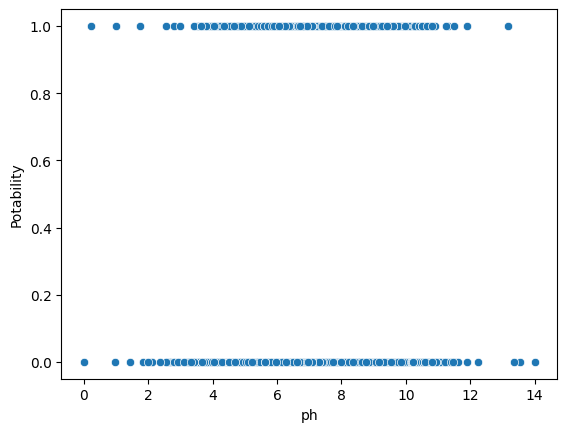

In [22]:
sns.scatterplot(x=df['ph'],y=df['Potability'])

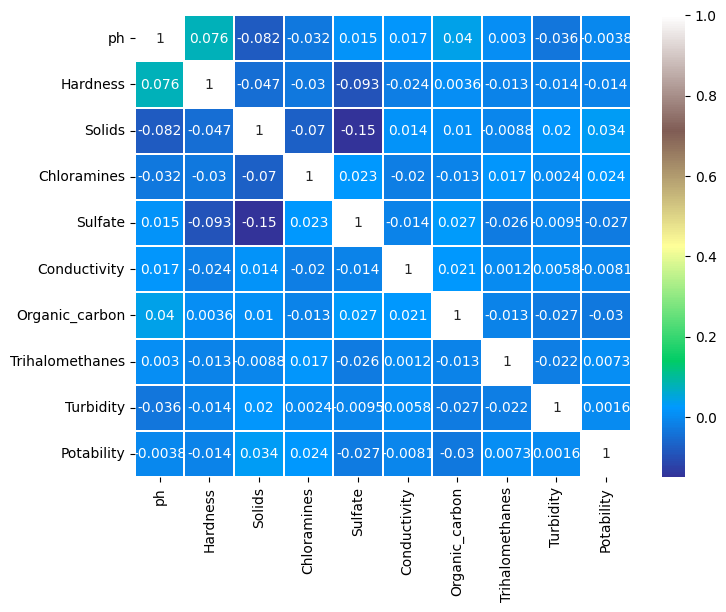

In [23]:
# create a correlation heatmap
sns.heatmap(df.corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

In [24]:
columns =['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity','Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']
for i in columns:
    percentile25 = df[i].quantile(0.25)
    percentile75 = df[i].quantile(0.75)
    iqr=percentile75-percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr

    new_df = df[df[i] < lower_limit]
    new_df2 = df[df[i] > upper_limit]
    outliers=len(new_df)+len(new_df2)
    print(f"The number of outliers in {i}: {outliers}")
    df[i] = np.where(df[i] < lower_limit, lower_limit, df[i])
    df[i] = np.where(df[i] > upper_limit,upper_limit, df[i])

The number of outliers in ph: 142
The number of outliers in Hardness: 83
The number of outliers in Solids: 47
The number of outliers in Chloramines: 61
The number of outliers in Sulfate: 264
The number of outliers in Conductivity: 11
The number of outliers in Organic_carbon: 25
The number of outliers in Trihalomethanes: 54
The number of outliers in Turbidity: 19
The number of outliers in Potability: 0


In [25]:
for i in columns:
    percentile25 = df[i].quantile(0.25)
    percentile75 = df[i].quantile(0.75)
    iqr=percentile75-percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr

    new_df = df[df[i] < lower_limit]
    new_df2 = df[df[i] > upper_limit]
    outliers=len(new_df)+len(new_df2)
    print(f"The number of outliers in {i}: {outliers}")

The number of outliers in ph: 0
The number of outliers in Hardness: 0
The number of outliers in Solids: 0
The number of outliers in Chloramines: 0
The number of outliers in Sulfate: 0
The number of outliers in Conductivity: 0
The number of outliers in Organic_carbon: 0
The number of outliers in Trihalomethanes: 0
The number of outliers in Turbidity: 0
The number of outliers in Potability: 0


<Axes: >

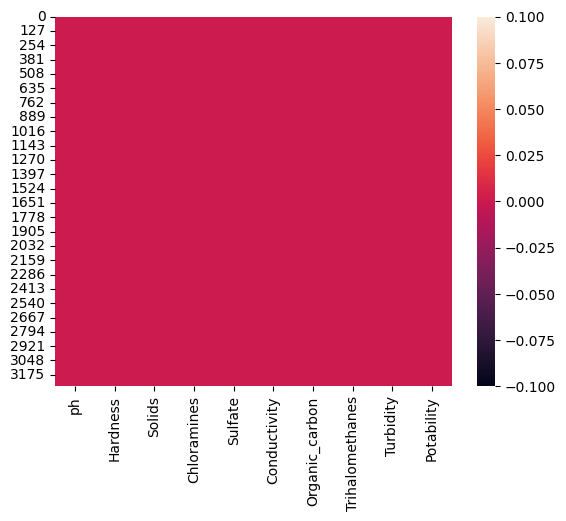

In [26]:
sns.heatmap(df.isnull())

In [27]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.085378  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.889107  129.422921  18630.057858     6.635246  334.564290    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  334.564290    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135         0.0  
1       15.180013        56.329076   4.500656         0.0  
2       16.868637        66.420093   3.055934         0.0  
3       18.436524       100.341674   4.628771         0.0  
4       11.558279        31.997993   4.075075         0.0

Logistic Regression

In [28]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [29]:
x=df.drop(columns=['Potability'])
y=df['Potability']

In [30]:
x.shape,y.shape

((3276, 9), (3276,))

In [31]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size =1/5, random_state = 0)

In [32]:
X_train.shape,X_test.shape

((2620, 9), (656, 9))

In [33]:
log=LogisticRegression(max_iter=1000,random_state=0)

In [34]:
#Training Model
log.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [35]:
y_pred=log.predict(X_test)

In [36]:
accuracy_score_log =accuracy_score(y_test,y_pred)
Log_accuracy=accuracy_score_log*100
print(Log_accuracy)

62.80487804878049


In [37]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[412   0]
 [244   0]]


In [38]:
cr=classification_report(y_test, y_pred,zero_division=1)
print(cr)

              precision    recall  f1-score   support

         0.0       0.63      1.00      0.77       412
         1.0       1.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.81      0.50      0.39       656
weighted avg       0.77      0.63      0.48       656



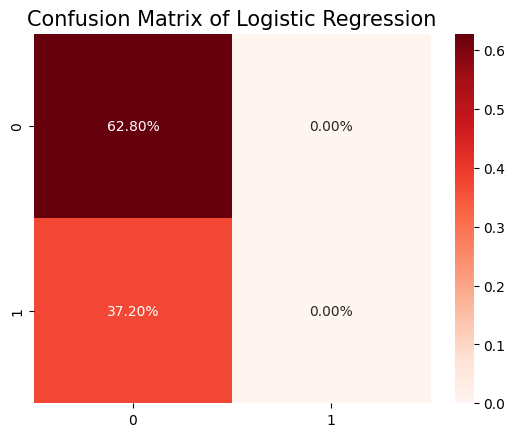

In [39]:
# confusion Maxtrix
cm1 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.title("Confusion Matrix of Logistic Regression", size=15)
plt.show()

Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
dt=DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [41]:
prediction=dt.predict(X_test)
accuracy_dt=accuracy_score(y_test,prediction)*100
accuracy_dt

72.5609756097561

In [42]:
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

Accuracy on training set: 0.718
Accuracy on test set: 0.726


In [43]:
print("\nClassification Report:")
print(classification_report(y_test, prediction))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.87      0.80       412
         1.0       0.69      0.48      0.57       244

    accuracy                           0.73       656
   macro avg       0.71      0.68      0.68       656
weighted avg       0.72      0.73      0.71       656



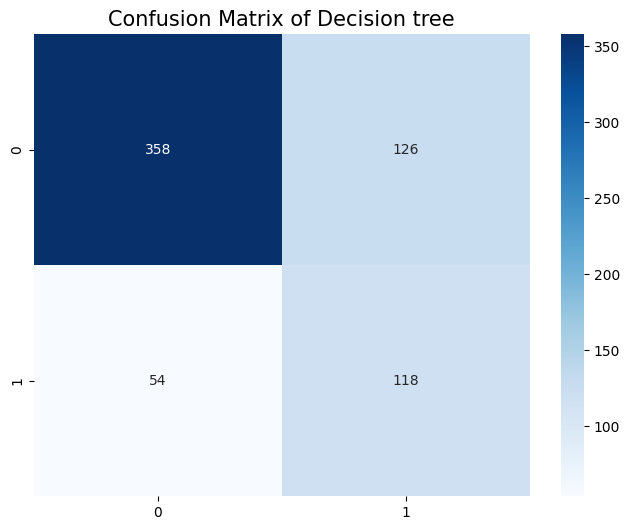

In [44]:
cmmm=confusion_matrix(prediction,y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cmmm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix of Decision tree", size=15)
plt.show()

Random Forest

In [45]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

In [46]:
rf = RandomForestClassifier(min_samples_leaf = 2, n_estimators = 1000 , random_state = 0)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

rf_accuracy=accuracy_score(rf_pred, y_test)*100
rf_accuracy

80.64024390243902

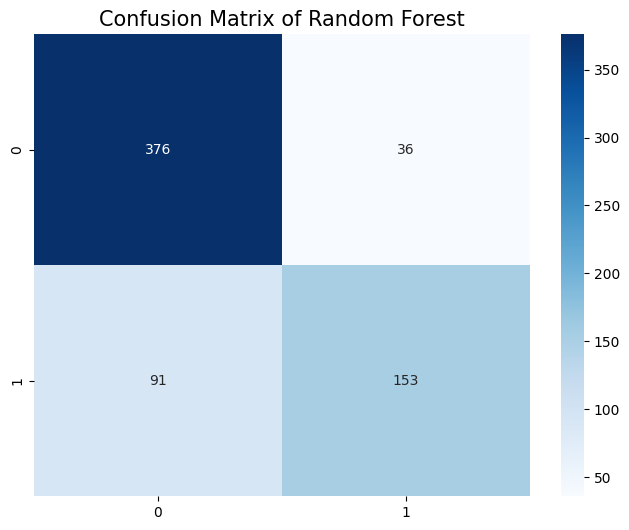

In [47]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix of Random Forest", size=15)
plt.show()

Hist Gradient Boost

In [48]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble  import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

c:\Users\Nadeen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning:

Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.



In [49]:
hgbc = HistGradientBoostingClassifier(random_state=0, max_leaf_nodes=None, min_samples_leaf=2, max_iter=1000)
hgbc.fit(X_train, y_train)

HistGradientBoostingClassifier(max_iter=1000, max_leaf_nodes=None,
                               min_samples_leaf=2, random_state=0)

In [50]:
hgbc_pred = hgbc.predict(X_test)
hist_accuracy=accuracy_score(hgbc_pred, y_test)*100
hist_accuracy

78.8109756097561

In [51]:
print('Classification report')
print(classification_report(y_test, hgbc_pred))


Classification report
              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84       412
         1.0       0.75      0.65      0.70       244

    accuracy                           0.79       656
   macro avg       0.78      0.76      0.77       656
weighted avg       0.79      0.79      0.78       656



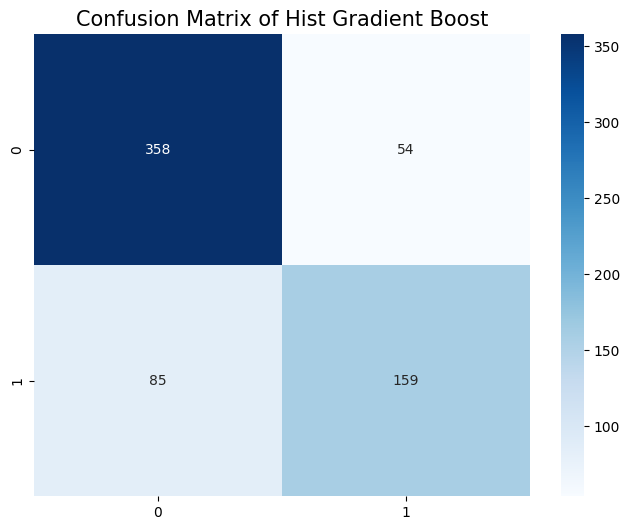

In [52]:
cm_matrix=confusion_matrix(y_test,hgbc_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_matrix, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix of Hist Gradient Boost", size=15)

plt.show()

KNeighborsClassifier

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
for i in range (4,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    prediction_knn=knn.predict(X_test)
    accuracy_knn=accuracy_score(y_test,prediction_knn)
    print(accuracy_knn)



0.5670731707317073
0.5411585365853658
0.5685975609756098
0.5533536585365854
0.5655487804878049
0.5533536585365854
0.5792682926829268
0.5762195121951219
0.5960365853658537
0.586890243902439
0.5975609756097561


In [55]:
knn=KNeighborsClassifier( n_neighbors=22)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=22)

In [56]:
prediction_knn=knn.predict(X_test)
accuracy_knn=accuracy_score(y_test,prediction_knn)*100
accuracy_knn

60.670731707317074

In [57]:
print('Classification report')
print(classification_report(y_test, prediction_knn))


Classification report
              precision    recall  f1-score   support

         0.0       0.63      0.89      0.74       412
         1.0       0.41      0.12      0.19       244

    accuracy                           0.61       656
   macro avg       0.52      0.51      0.46       656
weighted avg       0.55      0.61      0.54       656



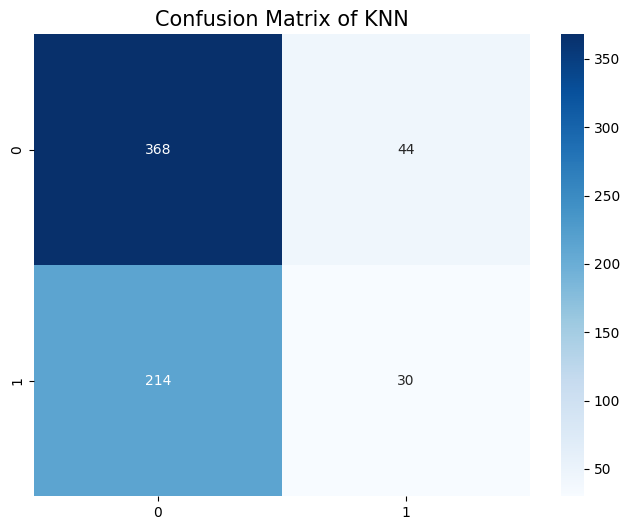

In [58]:

cm_matrix1=confusion_matrix(y_test,prediction_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_matrix1, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix of KNN", size=15)

plt.show()



svm

In [59]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score

In [60]:
param_grid_svm = {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']}
svm_classifier=SVC(kernel="rbf", random_state=0)

In [61]:
svm_classifier.fit(X_train,y_train)

SVC(random_state=0)

In [62]:
pred_svm = svm_classifier.predict(X_test)

In [63]:
accuracy_score_svm = accuracy_score(y_test,pred_svm)*100
accuracy_score_svm

62.80487804878049

In [64]:
print('Classification report')
print(classification_report(y_test, pred_svm,zero_division=1))


Classification report
              precision    recall  f1-score   support

         0.0       0.63      1.00      0.77       412
         1.0       1.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.81      0.50      0.39       656
weighted avg       0.77      0.63      0.48       656



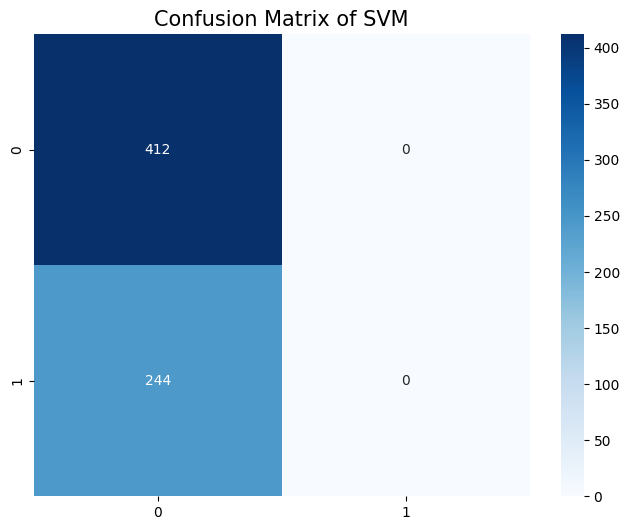

In [65]:
cm_matrix2=confusion_matrix(y_test,pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_matrix2, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix of SVM", size=15)

plt.show()

Ada Boost Classifiers


In [66]:
from sklearn.ensemble import AdaBoostClassifier
model_ada=AdaBoostClassifier(n_estimators=200) 

In [67]:
model_ada.fit(X_train,y_train)

c:\Users\Nadeen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



AdaBoostClassifier(n_estimators=200)

In [68]:
predict_ada=model_ada.predict(X_test)
accuracy_ada=accuracy_score(y_test,predict_ada)*100
accuracy_ada

74.6951219512195

In [69]:
print('Classification report')
print(classification_report(y_test, predict_ada))

Classification report
              precision    recall  f1-score   support

         0.0       0.76      0.87      0.81       412
         1.0       0.71      0.55      0.62       244

    accuracy                           0.75       656
   macro avg       0.74      0.71      0.71       656
weighted avg       0.74      0.75      0.74       656



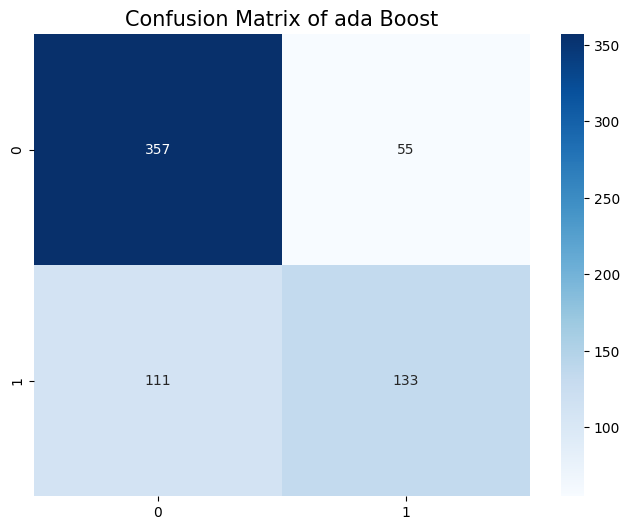

In [70]:

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, predict_ada), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix of ada Boost", size=15)
plt.show()

XGBoost

In [71]:
from xgboost import XGBClassifier 
model_xgboost=XGBClassifier(n_estimators=280, learning_rate=0.03)
model_xgboost.fit(X_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=280, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [72]:
y_predicate_xg=model_xgboost.predict(X_test)
accuracy_xg=accuracy_score(y_test,y_predicate_xg)*100
accuracy_xg

82.01219512195121

In [73]:
print('Classification report')
print(classification_report(y_test, y_predicate_xg))

Classification report
              precision    recall  f1-score   support

         0.0       0.81      0.93      0.87       412
         1.0       0.84      0.64      0.72       244

    accuracy                           0.82       656
   macro avg       0.83      0.78      0.80       656
weighted avg       0.82      0.82      0.81       656



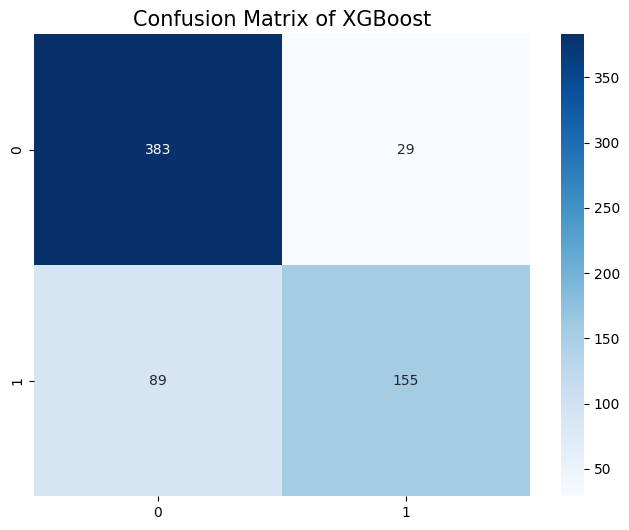

In [74]:

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_predicate_xg), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix of XGBoost", size=15)
plt.show()

naive bayes

In [75]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
predicty_naive=naive_bayes_model.predict(X_test)
accuracy_naive=accuracy_score(y_test,predicty_naive)
accuracy_naive*100

61.58536585365854

Accuracy table


In [76]:

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Hist Gradient Boost', 'KNN', 'SVM','ada Boost classifier','XGBOOST']
predictions = [y_pred, prediction, rf_pred, hgbc_pred, prediction_knn, pred_svm, predict_ada, y_predicate_xg]
accuracy = []
precision = []
recall = []
f1_score = []


In [77]:
for idx, pred in enumerate(predictions):
    accuracy.append(metrics.accuracy_score(y_test, pred))
    # output dict conmtrol output formating, zero dev bec there are prtable 0 more than 1
    report = classification_report(y_test, pred, output_dict=True,zero_division=1)
    precision.append(report['weighted avg']['precision'])
    recall.append(report['weighted avg']['recall'])
    f1_score.append(report['weighted avg']['f1-score'])




In [78]:
model_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1_score
    
})

print(model_df)

                  Model  Accuracy  Precision    Recall  F1-Score
0   Logistic Regression  0.628049   0.766396  0.628049  0.484562
1         Decision Tree  0.725610   0.719724  0.725610  0.712889
2         Random Forest  0.806402   0.806770  0.806402  0.800164
3   Hist Gradient Boost  0.788110   0.785197  0.788110  0.784764
4                   KNN  0.606707   0.547908  0.606707  0.535214
5                   SVM  0.628049   0.766396  0.628049  0.484562
6  ada Boost classifier  0.746951   0.742224  0.746951  0.738601
7               XGBOOST  0.820122   0.822953  0.820122  0.813618


In [88]:
import json

# Dictionary containing accuracies
accuracies = {
    "Logistic Regression": round(Log_accuracy,2),
    "Decision Tree":round (accuracy_dt,2),
    "Random Forest":round (rf_accuracy,2),
    "KNN":round(accuracy_knn,2),
    "SVM":round( accuracy_score_svm,2),
    "ada Boost classifier":round( accuracy_ada,2),
    "XGBOOST":round( accuracy_xg,2),
    "Naive": 0.51*100
}

# Save in a JSON file
with open('accuracies.json', 'w') as f:
    json.dump(accuracies, f)

In [89]:
import joblib
models = {
    'knn': knn,
    'log': log,
    'rf': rf,
    'dt': dt,
    'svm_classifier': svm_classifier,
    'hgbc':hgbc,
    'model_xgboost': model_xgboost,
    'model_ada': model_ada,
    'naive_bayes_model':naive_bayes_model
}
file = 'water_quality'
joblib.dump(models, file)

['water_quality']